In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score  
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics 
from sklearn import cross_validation, metrics 
from matplotlib import pyplot as plt
from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV 
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [86]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

In [349]:
X = pd.read_pickle('IndependentVar')
y = pd.read_pickle('TargetVariable')

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [351]:
clf = DecisionTreeClassifier(min_samples_leaf=15,max_depth=4,min_samples_split=40)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [352]:
y_predict=clf.predict(X_train)
accuracy = accuracy_score(y_train, y_predict)
accuracy  ## TRAINING ACCURACY

0.8263473053892215

In [353]:
test_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test , test_predict)
accuracy

0.8026905829596412

In [354]:
pred = clf.predict_proba(X_train)
X_train['prediction']=pred[:,1]
X_test['prediction']=clf.predict_proba(X_test)[:,1]

C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [355]:
def count_leaf(tree1):
    count = np.sum(np.logical_and(tree1.tree_.children_left==-1,tree1.tree_.children_right==-1))
    return count

In [356]:
def score_sum(tree,data):
    array = tree.tree_.value[np.unique(tree.tree_.apply(np.array(data, dtype=np.float32)))]
    sum_score = 0
    for i in range(len(array)):
        total = array[i][0][0]+array[i][0][1]
        array[i][0][0]=np.divide(array[i][0][0],total)
        array[i][0][1]=np.divide(array[i][0][1],total)
        sum_score = sum_score + array[i][0][1]*array[i][0][1]
    return sum_score

In [329]:
array = clf.tree_.value[np.unique(clf.tree_.apply(np.array(X_train, dtype=np.float32)))]

In [330]:
array

array([[[  2.,  49.]],

       [[  0.,  53.]],

       [[  2.,  14.]],

       [[ 11.,  27.]],

       [[ 27.,  26.]],

       [[ 17.,   1.]],

       [[  6.,  15.]],

       [[ 14.,  12.]],

       [[ 42.,  16.]],

       [[214.,  35.]],

       [[ 80.,   5.]]])

In [357]:
def score_sum1(tree,data):
    array = tree.tree_.value[np.unique(tree.tree_.apply(np.array(data, dtype=np.float32)))]
    sum_score = 0
    for i in range(len(array)):
        sum_score = sum_score + array[i][0][0]*array[i][0][0]
        
    return sum_score

In [358]:
X_train_const = X_train.copy()

In [359]:
Training_AUC = []
Testing_AUC = []

In [360]:
# 1st Iteration Gamma = 0.01 , Lambda = 1
clf2 = DecisionTreeRegressor(criterion = "mse",min_samples_leaf=15,max_depth=4,min_samples_split=40)

train_errorn =y_train['Survived']-X_train['prediction']
regularization_term = 0.01*count_leaf(clf)+0.5*0.05*score_sum(clf,X_train_const)
train_errorn = train_errorn+regularization_term

X_train2=X_train.drop(['prediction'],axis=1)
X_test2=X_test.drop(['prediction'],axis=1)

dt2 = clf2.fit(X_train2, train_errorn)
train_error_pred = dt2.predict(X_train2)

X_train['prediction']=(X_train['prediction']+0.5*train_error_pred)

train_auc=roc_auc_score(y_train,X_train['prediction'])
print("AUC on training data set is: "+str(train_auc))
Training_AUC.append(train_auc)

test_error_pred = clf2.predict(X_test2)
X_test['prediction']=(X_test['prediction']+0.5*test_error_pred)

test_auc=roc_auc_score(y_test,X_test['prediction'])
Testing_AUC.append(test_auc)

print("AUC on test data set is: "+str(test_auc))

AUC on training data set is: 0.892742511548169
AUC on test data set is: 0.8559449941304713


C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [361]:
for i in range(20):
    train_errorn =y_train['Survived']-X_train['prediction']
    regularization_term = 0.01*count_leaf(clf2)+0.5*0.05*score_sum1(clf2,X_train2)
    train_errorn = train_errorn+regularization_term

    X_train2=X_train.drop(['prediction'],axis=1)
    X_test2=X_test.drop(['prediction'],axis=1)

    dt2=clf2.fit(X_train2, train_errorn)
    train_error_pred = dt2.predict(X_train2)

    X_train['prediction']=(X_train['prediction']+0.5*train_error_pred)

    train_auc=roc_auc_score(y_train,X_train['prediction'])
    print("AUC on training data set is: "+str(train_auc))
    Training_AUC.append(train_auc)
    
    test_error_pred = clf2.predict(X_test2)
    X_test['prediction']=(X_test['prediction']+0.5*test_error_pred)
    
    test_auc=roc_auc_score(y_test,X_test['prediction'])
    print("AUC on test data set is: "+str(test_auc))
    Testing_AUC.append(test_auc)
    

C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\sabhila1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AUC on training data set is: 0.8967665126910807
AUC on test data set is: 0.8597182626194868
AUC on training data set is: 0.8994380684794514
AUC on test data set is: 0.8563642461848063
AUC on training data set is: 0.9080527644173532
AUC on test data set is: 0.844415562636257
AUC on training data set is: 0.915748368969951
AUC on test data set is: 0.8532198557772934
AUC on training data set is: 0.9197009381399114
AUC on test data set is: 0.8582089552238806
AUC on training data set is: 0.9212629172817753
AUC on test data set is: 0.8548968639946336
AUC on training data set is: 0.9213105385970761
AUC on test data set is: 0.8556515176924366
AUC on training data set is: 0.9229439497118911
AUC on test data set is: 0.8550645648163676
AUC on training data set is: 0.9270346206962236
AUC on test data set is: 0.8547291631728996
AUC on training data set is: 0.9343730653840661
AUC on test data set is: 0.8543518363239979
AUC on training data set is: 0.9377017953235868
AUC on test data set is: 0.8541002

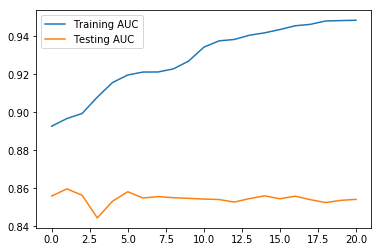

In [362]:
plt.plot(Training_AUC, label = 'Training AUC')
plt.plot(Testing_AUC, label = 'Testing AUC')
plt.legend(loc = 'best')
plt.show()